In [1]:
# File to use to test the main function, utility functions, and structure. Later will move changes to functions to separate files in utils folder.

In [2]:
#imports
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# import functions
from utils.AlpacaFunctions import get_historical_dataframe
from utils.data_process import return_rolling_averages
from utils.data_process import return_crossovers

In [1392]:
# set ticker, start date, end date, timeframe
ticker = "SPY"

today = pd.Timestamp.now(tz="America/New_York")

start_date = pd.Timestamp(today - pd.Timedelta(days=700)).isoformat()

end_date = today

timeframe = '1D'

In [1393]:
df = pd.DataFrame(get_historical_dataframe(ticker, start_date, end_date, timeframe)[ticker])

In [1394]:
volume_df = pd.DataFrame(df["volume"])

In [1395]:
volume_df

,volume
time,
2020-02-13 00:00:00-05:00,43458291
2020-02-14 00:00:00-05:00,48454165
2020-02-18 00:00:00-05:00,45739289
2020-02-19 00:00:00-05:00,34121414
2020-02-20 00:00:00-05:00,63734196
...,...
2022-01-07 00:00:00-05:00,67943055
2022-01-10 00:00:00-05:00,106360848
2022-01-11 00:00:00-05:00,62346155


In [1396]:
close_df = pd.DataFrame(df["close"])

In [1397]:
close_df.head(20)

,close
time,
2020-02-13 00:00:00-05:00,337.0800
2020-02-14 00:00:00-05:00,337.6000
2020-02-18 00:00:00-05:00,336.7000
2020-02-19 00:00:00-05:00,338.3100
2020-02-20 00:00:00-05:00,338.3379
2020-02-21 00:00:00-05:00,333.4900
2020-02-24 00:00:00-05:00,322.4100
2020-02-25 00:00:00-05:00,312.7000
2020-02-26 00:00:00-05:00,311.5500


In [1398]:
return_rolling_averages(close_df)

In [1399]:
close_df.head(20)

,close,2,3,5,8,10,13,20,21,34,50,55,89,100,144,200
time,,,,,,,,,,,,,,,,
2020-02-13 00:00:00-05:00,337.0800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-14 00:00:00-05:00,337.6000,337.34000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-18 00:00:00-05:00,336.7000,337.15000,337.126667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-19 00:00:00-05:00,338.3100,337.50500,337.536667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-20 00:00:00-05:00,338.3379,338.32395,337.782633,337.60558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-21 00:00:00-05:00,333.4900,335.91395,336.712633,336.88758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24 00:00:00-05:00,322.4100,327.95000,331.412633,333.84958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-25 00:00:00-05:00,312.7000,317.55500,322.866667,329.04958,332.078487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26 00:00:00-05:00,311.5500,312.12500,315.553333,323.69758,328.887238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1400]:
cross_df = return_crossovers(close_df)

In [1401]:
cross_df.head(20)

,close to 2,close to 3,close to 5,close to 8,close to 10,close to 13,close to 20,close to 21,close to 34,close to 50,...,55 to 89,55 to 100,55 to 144,55 to 200,89 to 100,89 to 144,89 to 200,100 to 144,100 to 200,144 to 200
time,,,,,,,,,,,,,,,,,,,,,
2020-02-13 00:00:00-05:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-14 00:00:00-05:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-18 00:00:00-05:00,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-19 00:00:00-05:00,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-20 00:00:00-05:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-21 00:00:00-05:00,-1,-1,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-24 00:00:00-05:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-25 00:00:00-05:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-26 00:00:00-05:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1402]:
pct_change_df = close_df.pct_change()

In [1403]:
pct_change_df

,close,2,3,5,8,10,13,20,21,34,50,55,89,100,144,200
time,,,,,,,,,,,,,,,,
2020-02-13 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-14 00:00:00-05:00,0.001543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-18 00:00:00-05:00,-0.002666,-0.000563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-19 00:00:00-05:00,0.004782,0.001053,0.001216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-20 00:00:00-05:00,0.000082,0.002426,0.000729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07 00:00:00-05:00,-0.003868,-0.002414,-0.008056,-0.003706,-0.002836,-0.000940,0.001816,-0.000023,-0.000347,-0.000226,0.000523,0.000537,0.000353,0.000485,0.000644,0.000871
2022-01-10 00:00:00-05:00,-0.001201,-0.002537,-0.002011,-0.005175,-0.003143,-0.002470,0.000411,-0.000549,-0.000079,-0.000211,0.000313,0.000467,0.000305,0.000579,0.000672,0.000792
2022-01-11 00:00:00-05:00,0.008978,0.003885,0.001293,-0.003313,-0.001698,-0.001512,0.000334,0.000333,-0.000099,0.000139,0.000451,0.000649,0.000411,0.000656,0.000739,0.000845


In [1404]:
signals_input_df = pd.concat([pct_change_df, cross_df, volume_df], axis=1)

In [1405]:
X = signals_input_df.dropna()

In [1406]:
X

,close,2,3,5,8,10,13,20,21,34,...,55 to 100,55 to 144,55 to 200,89 to 100,89 to 144,89 to 200,100 to 144,100 to 200,144 to 200,volume
time,,,,,,,,,,,,,,,,,,,,,
2020-11-27 00:00:00-05:00,0.002757,0.000634,0.005705,0.003279,0.000424,0.002891,0.001958,0.004796,0.005035,0.001421,...,0,0,0,0,0,0,0,0,0,46840189
2020-11-30 00:00:00-05:00,-0.004537,-0.000895,-0.001092,0.003695,0.000473,0.001298,0.001701,0.005030,0.004336,0.000808,...,0,0,0,0,0,0,0,0,0,67154075
2020-12-01 00:00:00-05:00,0.010967,0.003197,0.003051,0.004699,0.003363,0.000983,0.002003,0.005046,0.005320,0.001334,...,0,0,0,0,0,0,0,0,0,64527332
2020-12-02 00:00:00-05:00,0.002158,0.006539,0.002849,0.001964,0.003116,0.001698,0.002882,0.004323,0.004904,0.001582,...,0,0,0,0,0,0,0,0,0,37323404
2020-12-03 00:00:00-05:00,-0.000246,0.000955,0.004266,0.002207,0.003911,0.002874,0.001991,0.003239,0.004099,0.001611,...,0,0,0,0,0,0,0,0,0,52905586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07 00:00:00-05:00,-0.003868,-0.002414,-0.008056,-0.003706,-0.002836,-0.000940,0.001816,-0.000023,-0.000347,-0.000226,...,0,0,0,0,0,0,0,0,0,67943055
2022-01-10 00:00:00-05:00,-0.001201,-0.002537,-0.002011,-0.005175,-0.003143,-0.002470,0.000411,-0.000549,-0.000079,-0.000211,...,0,0,0,0,0,0,0,0,0,106360848
2022-01-11 00:00:00-05:00,0.008978,0.003885,0.001293,-0.003313,-0.001698,-0.001512,0.000334,0.000333,-0.000099,0.000139,...,0,0,0,0,0,0,0,0,0,62346155


In [1407]:
# generate target signal. 1 = buy if next day will go up. 0 = sell if next day will go down.

In [1408]:
# next few cells are to compare to get the right signal syntax below
close_df["close"]

time
2020-02-13 00:00:00-05:00    337.0800
2020-02-14 00:00:00-05:00    337.6000
2020-02-18 00:00:00-05:00    336.7000
2020-02-19 00:00:00-05:00    338.3100
2020-02-20 00:00:00-05:00    338.3379
                               ...   
2022-01-07 00:00:00-05:00    466.1200
2022-01-10 00:00:00-05:00    465.5600
2022-01-11 00:00:00-05:00    469.7400
2022-01-12 00:00:00-05:00    471.0600
2022-01-13 00:00:00-05:00    466.1150
Name: close, Length: 485, dtype: float64

In [1409]:
close_df["close"].shift()

time
2020-02-13 00:00:00-05:00       NaN
2020-02-14 00:00:00-05:00    337.08
2020-02-18 00:00:00-05:00    337.60
2020-02-19 00:00:00-05:00    336.70
2020-02-20 00:00:00-05:00    338.31
                              ...  
2022-01-07 00:00:00-05:00    467.93
2022-01-10 00:00:00-05:00    466.12
2022-01-11 00:00:00-05:00    465.56
2022-01-12 00:00:00-05:00    469.74
2022-01-13 00:00:00-05:00    471.06
Name: close, Length: 485, dtype: float64

In [1410]:
close_df["close"] > close_df["close"].shift()

time
2020-02-13 00:00:00-05:00    False
2020-02-14 00:00:00-05:00     True
2020-02-18 00:00:00-05:00    False
2020-02-19 00:00:00-05:00     True
2020-02-20 00:00:00-05:00     True
                             ...  
2022-01-07 00:00:00-05:00    False
2022-01-10 00:00:00-05:00    False
2022-01-11 00:00:00-05:00     True
2022-01-12 00:00:00-05:00     True
2022-01-13 00:00:00-05:00    False
Name: close, Length: 485, dtype: bool

In [1411]:
# this should the proper signal
# to double check if this is working right, look at the tail end. should give 0 if the following day it goes down, 1 if the following day will go up.
y_signal = ((close_df["close"] > close_df["close"].shift()).shift(-1))*1

In [1412]:
y_signal

time
2020-02-13 00:00:00-05:00      1
2020-02-14 00:00:00-05:00      0
2020-02-18 00:00:00-05:00      1
2020-02-19 00:00:00-05:00      1
2020-02-20 00:00:00-05:00      0
                            ... 
2022-01-07 00:00:00-05:00      0
2022-01-10 00:00:00-05:00      1
2022-01-11 00:00:00-05:00      1
2022-01-12 00:00:00-05:00      0
2022-01-13 00:00:00-05:00    NaN
Name: close, Length: 485, dtype: object

In [1413]:
y = pd.DataFrame(y_signal).loc[X.index]

In [1414]:
y.iloc[-1]=0

In [1415]:
y

,close
time,
2020-11-27 00:00:00-05:00,0
2020-11-30 00:00:00-05:00,1
2020-12-01 00:00:00-05:00,1
2020-12-02 00:00:00-05:00,0
2020-12-03 00:00:00-05:00,1
...,...
2022-01-07 00:00:00-05:00,0
2022-01-10 00:00:00-05:00,1
2022-01-11 00:00:00-05:00,1


In [1416]:
# check if the output is as expected - above y signal should generate a buy signal if tomorrow will go up, sell if tomorrow will go down
close_df["close"].tail(10)

time
2021-12-31 00:00:00-05:00    474.890
2022-01-03 00:00:00-05:00    477.760
2022-01-04 00:00:00-05:00    477.510
2022-01-05 00:00:00-05:00    468.380
2022-01-06 00:00:00-05:00    467.930
2022-01-07 00:00:00-05:00    466.120
2022-01-10 00:00:00-05:00    465.560
2022-01-11 00:00:00-05:00    469.740
2022-01-12 00:00:00-05:00    471.060
2022-01-13 00:00:00-05:00    466.115
Name: close, dtype: float64

In [1417]:
# train test split 100 days back
X_train=X[:-100]

In [1418]:
X_test=X[-100:]

In [1419]:
y_train=y[:-100]

In [1420]:
y_test=y[-100:]

In [1421]:
scaler = StandardScaler()

In [1422]:
X_scaler = scaler.fit(X_train)

In [1423]:
X_train_scaled = scaler.transform(X_train)

In [1424]:
X_test_scaled = scaler.transform(X_test)

In [1425]:
#set up neural network
number_output_neurons = 1

In [1426]:
number_input_features=X_train.shape[1]

In [1427]:
hidden_nodes_layer1= (number_input_features + number_output_neurons)//2

In [1428]:
hidden_nodes_layer2= (hidden_nodes_layer1 + number_output_neurons)//2

In [1429]:
# begin model initialization and fitting

In [1430]:
model=Sequential()

In [1431]:
model.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation = "relu"))

In [1432]:
model.add(Dense(units=hidden_nodes_layer2, activation = "relu"))

In [1433]:
model.add(Dense(units=1, activation = "sigmoid"))

In [1434]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 69)                9522      
                                                                 
 dense_28 (Dense)            (None, 35)                2450      
                                                                 
 dense_29 (Dense)            (None, 1)                 36        
                                                                 
Total params: 12,008
Trainable params: 12,008
Non-trainable params: 0
_________________________________________________________________


In [1435]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [1436]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)

In [1437]:
X_train_scaled_df

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,0.205991,-0.093194,1.145501,0.757013,-0.361495,1.028765,0.594549,3.416784,3.640761,0.243516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.585583
1,-0.737080,-0.386226,-0.552489,0.904006,-0.337137,0.085556,0.402916,3.641928,2.966074,-0.656566,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.273517
2,1.267296,0.398177,0.482465,1.258171,1.115018,-0.101208,0.627549,3.657092,3.916007,0.116302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.162429
3,0.128539,1.038695,0.432067,0.293100,0.991040,0.321929,1.282834,2.960717,3.514272,0.480913,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.988060
4,-0.182255,-0.031602,0.786010,0.378930,1.390241,1.018662,0.618661,1.917637,2.736710,0.522907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.329070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,-1.006538,-0.609679,-0.470069,-0.177980,-0.250619,-0.290331,-0.425968,0.221481,0.774786,-0.223998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.992779
181,-1.562482,-1.894754,-1.529655,-1.118347,-1.042681,-0.656464,-0.772394,-0.694501,-0.369442,-0.743929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.397815
182,0.034943,-1.130504,-1.627958,-1.232615,-0.900168,-0.940871,-0.572769,-0.728598,-0.671659,-0.918324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.021423
183,0.875301,0.683743,-0.417458,-0.809377,-0.479749,-0.574968,-0.579363,-0.828088,-0.406126,-0.898207,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.102913


In [1438]:
y_train["close"]

time
2020-11-27 00:00:00-05:00    0
2020-11-30 00:00:00-05:00    1
2020-12-01 00:00:00-05:00    1
2020-12-02 00:00:00-05:00    0
2020-12-03 00:00:00-05:00    1
                            ..
2021-08-17 00:00:00-04:00    0
2021-08-18 00:00:00-04:00    1
2021-08-19 00:00:00-04:00    1
2021-08-20 00:00:00-04:00    1
2021-08-23 00:00:00-04:00    1
Name: close, Length: 185, dtype: object

In [1439]:
X_train_scaled_array=np.asarray(X_train_scaled).astype(np.int)

y_train_array=np.asarray(y_train).astype(np.int)

y_test_array=np.asarray(y_test).astype(np.int)

C:\Users\phods\anaconda3\envs\dev2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
C:\Users\phods\anaconda3\envs\dev2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

In [1440]:
fit_model = model.fit(X_train_scaled_array, y_train_array, validation_split=.3, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 103ms/step - loss: 0.7381 - accuracy: 0.4651 - val_loss: 0.7240 - val_accuracy: 0.4821
Epoch 2/100
5/5 [==============================] - 0s 29ms/step - loss: 0.6763 - accuracy: 0.5891 - val_loss: 0.7027 - val_accuracy: 0.5357
Epoch 3/100
5/5 [==============================] - 0s 27ms/step - loss: 0.6436 - accuracy: 0.6357 - val_loss: 0.6874 - val_accuracy: 0.5714
Epoch 4/100
5/5 [==============================] - 0s 27ms/step - loss: 0.6187 - accuracy: 0.6899 - val_loss: 0.6785 - val_accuracy: 0.5536
Epoch 5/100
5/5 [==============================] - 0s 27ms/step - loss: 0.5975 - accuracy: 0.7132 - val_loss: 0.6783 - val_accuracy: 0.5714
Epoch 6/100
5/5 [==============================] - 0s 29ms/step - loss: 0.5797 - accuracy: 0.7364 - val_loss: 0.6801 - val_accuracy: 0.5536
Epoch 7/100
5/5 [==============================] - 0s 29ms/step - loss: 0.5664 - accuracy: 0.7752 - val_loss: 0.6801 - val_accuracy: 0.5536
Epoch 8/100
5/5 [==

In [1441]:
trained_predictions = pd.DataFrame((model.predict(X_test_scaled)).round(), index=y_test.index)

In [1442]:
trained_predictions

,0
time,
2021-08-24 00:00:00-04:00,1.0
2021-08-25 00:00:00-04:00,1.0
2021-08-26 00:00:00-04:00,1.0
2021-08-27 00:00:00-04:00,1.0
2021-08-30 00:00:00-04:00,1.0
...,...
2022-01-07 00:00:00-05:00,1.0
2022-01-10 00:00:00-05:00,1.0
2022-01-11 00:00:00-05:00,1.0


In [1443]:
y_test

,close
time,
2021-08-24 00:00:00-04:00,1
2021-08-25 00:00:00-04:00,0
2021-08-26 00:00:00-04:00,1
2021-08-27 00:00:00-04:00,1
2021-08-30 00:00:00-04:00,0
...,...
2022-01-07 00:00:00-05:00,0
2022-01-10 00:00:00-05:00,1
2022-01-11 00:00:00-05:00,1


<AxesSubplot:xlabel='time'>

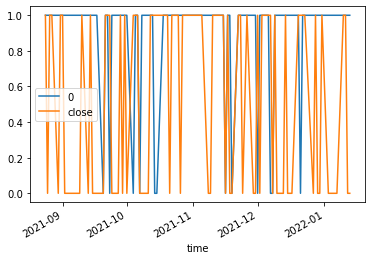

In [1444]:
ax = trained_predictions.plot()
y_test.plot(ax=ax)

In [1445]:
# this code gets the cumulative amount of purchase/buy signals
((trained_predictions -.5)*2).cumsum()

,0
time,
2021-08-24 00:00:00-04:00,1.0
2021-08-25 00:00:00-04:00,2.0
2021-08-26 00:00:00-04:00,3.0
2021-08-27 00:00:00-04:00,4.0
2021-08-30 00:00:00-04:00,5.0
...,...
2022-01-07 00:00:00-05:00,72.0
2022-01-10 00:00:00-05:00,73.0
2022-01-11 00:00:00-05:00,74.0


In [1446]:
trained_predictions.value_counts()

1.0    88
0.0    12
dtype: int64

In [1447]:
y_test.value_counts()

close
1        54
0        46
dtype: int64

In [1448]:
y_train.value_counts()

close
1        107
0         78
dtype: int64

In [1449]:
from sklearn.metrics import accuracy_score

In [1450]:
accuracy_score(trained_predictions, y_test_array)

0.52

In [1451]:
# begin test of output. 
# start with gain if you bought all day 1 of test period, sold all at end
# first test multiplies signal by pct change. 
# second test takes into account a starting amount of money, buys and sells a certain amount per day.
# third test keeps track of money available per day and puts a stop to buying when run out
# fourth test sells all if money is run out on next sell signal.
# fifth test sells all on next sell signal if available money is down to a third of the amount initially available.
# try to add feature to prevent any short selling when shares not available.

In [1452]:
close_df[-100:]["close"]

time
2021-08-24 00:00:00-04:00    447.950
2021-08-25 00:00:00-04:00    448.880
2021-08-26 00:00:00-04:00    446.270
2021-08-27 00:00:00-04:00    450.190
2021-08-30 00:00:00-04:00    452.220
                              ...   
2022-01-07 00:00:00-05:00    466.120
2022-01-10 00:00:00-05:00    465.560
2022-01-11 00:00:00-05:00    469.740
2022-01-12 00:00:00-05:00    471.060
2022-01-13 00:00:00-05:00    466.115
Name: close, Length: 100, dtype: float64

In [1453]:
# gain if you bought all day 1 and sold all at end of test period
close_df.iloc[-1]["close"]/close_df.iloc[-100]["close"]

1.040551400825985

In [1454]:
y_test.shape[0]

100

In [1455]:
y_train

,close
time,
2020-11-27 00:00:00-05:00,0
2020-11-30 00:00:00-05:00,1
2020-12-01 00:00:00-05:00,1
2020-12-02 00:00:00-05:00,0
2020-12-03 00:00:00-05:00,1
...,...
2021-08-17 00:00:00-04:00,0
2021-08-18 00:00:00-04:00,1
2021-08-19 00:00:00-04:00,1


In [1456]:
# get a read on how many trades above or below zero will be in the trade signal cumulative output
print(((y_train - .5) * 2).cumsum().max())
print(((y_train - .5) * 2).cumsum().min())

close    29.0
dtype: object
close   -3.0
dtype: object


In [1457]:
#get shorter close_df_test dataframe with only the test indexes

close_df_test = pd.DataFrame(close_df["close"]).loc[X_test.index]


In [1458]:
close_df_test

,close
time,
2021-08-24 00:00:00-04:00,447.950
2021-08-25 00:00:00-04:00,448.880
2021-08-26 00:00:00-04:00,446.270
2021-08-27 00:00:00-04:00,450.190
2021-08-30 00:00:00-04:00,452.220
...,...
2022-01-07 00:00:00-05:00,466.120
2022-01-10 00:00:00-05:00,465.560
2022-01-11 00:00:00-05:00,469.740


In [1459]:
# initiate start money amount and 0 shares held.
start_money = 10000
shares = 0
shares_df = pd.DataFrame(np.zeros(shape=y_test.shape[0]), index=y_test.index)
money_on_hand_df = pd.DataFrame(np.zeros(shape=y_test.shape[0]), index=y_test.index)
value_on_hand_df = pd.DataFrame(np.zeros(shape=y_test.shape[0]), index=y_test.index)
money_on_hand = start_money

In [1460]:
# get appropriate daily buy/sell amount per start money
# trade_amount = (start_money / ((y_train - .5) * 2).cumsum().max())["close"] #conservative amount expecting to not go under on money
trade_amount=3000 # a more aggressive amount expecting to go short on money or shares

In [1461]:
trade_amount

3000

In [1462]:
trained_predictions[0]

time
2021-08-24 00:00:00-04:00    1.0
2021-08-25 00:00:00-04:00    1.0
2021-08-26 00:00:00-04:00    1.0
2021-08-27 00:00:00-04:00    1.0
2021-08-30 00:00:00-04:00    1.0
                            ... 
2022-01-07 00:00:00-05:00    1.0
2022-01-10 00:00:00-05:00    1.0
2022-01-11 00:00:00-05:00    1.0
2022-01-12 00:00:00-05:00    1.0
2022-01-13 00:00:00-05:00    1.0
Name: 0, Length: 100, dtype: float32

In [1463]:
# test to add up all exercises, no stops or changes to purchase/sell amount in place.

# for day in range(len(trained_predictions)):
#     shares_df.iloc[day][0] = shares
#     money_on_hand_df.iloc[day][0] = money_on_hand
#     value_on_hand_df.iloc[day][0] = (shares * close_df_test.iloc[day]["close"]) + money_on_hand
#     if trained_predictions.iloc[day][0] == 0:
#         shares -= trade_amount / close_df_test.iloc[day]["close"]
#         money_on_hand += trade_amount
#     elif trained_predictions.iloc[day][0] == 1:
#         shares += trade_amount / close_df_test.iloc[day]["close"]
#         money_on_hand -= trade_amount

In [1464]:
# # # alternate test to add up all exercises, stops in place to prevent negative money or shares.

# for day in range(len(trained_predictions)):
#     shares_df.iloc[day][0] = shares
#     money_on_hand_df.iloc[day][0] = money_on_hand
#     value_on_hand_df.iloc[day][0] = (shares * close_df_test.iloc[day]["close"]) + money_on_hand
#     if (trained_predictions.iloc[day][0] == 0) & (shares - trade_amount / close_df_test.iloc[day]["close"] >= 0):
#         shares -= trade_amount / close_df_test.iloc[day]["close"]
#         money_on_hand += trade_amount
#     elif (trained_predictions.iloc[day][0] == 1) & (money_on_hand - trade_amount >= 0):
#         shares += trade_amount / close_df_test.iloc[day]["close"]
#         money_on_hand -= trade_amount

In [1465]:
# alternate test to add up all exercises, stops in place to prevent negative money or shares. 
# also increases sell amount on sell price if money supply is low.

# for day in range(len(trained_predictions)):
#     shares_df.iloc[day][0] = shares
#     money_on_hand_df.iloc[day][0] = money_on_hand
#     value_on_hand_df.iloc[day][0] = (shares * close_df_test.iloc[day]["close"]) + money_on_hand
#     if (trained_predictions.iloc[day][0] == 0) & (shares - trade_amount / close_df_test.iloc[day]["close"] >= 0):
#         if (money_on_hand < start_money/3):
#             shares -= (trade_amount / close_df_test.iloc[day]["close"])*3
#             money_on_hand += trade_amount*3
#         else:
#             shares -= trade_amount / close_df_test.iloc[day]["close"]
#             money_on_hand += trade_amount
#     elif (trained_predictions.iloc[day][0] == 1) & (money_on_hand - trade_amount >= 0):
#         shares += trade_amount / close_df_test.iloc[day]["close"]
#         money_on_hand -= trade_amount

In [1466]:
# # alternate test to add up all exercises, stops in place to prevent negative money or shares. 
# # if money is low, sell 1/3 of all shares. else execute trade per signal

# for day in range(len(trained_predictions)):
#     shares_df.iloc[day][0] = shares
#     money_on_hand_df.iloc[day][0] = money_on_hand
#     value_on_hand_df.iloc[day][0] = (shares * close_df_test.iloc[day]["close"]) + money_on_hand
#     if money_on_hand < (start_money/3):
#         money_on_hand += 1/3 *shares * close_df_test.iloc[day]["close"]
#         shares = shares*2/3
#     else:
#         if (trained_predictions.iloc[day][0] == 0) & (shares - trade_amount / close_df_test.iloc[day]["close"] >= 0):
#             shares -= trade_amount / close_df_test.iloc[day]["close"]
#             money_on_hand += trade_amount
#         elif (trained_predictions.iloc[day][0] == 1) & (money_on_hand - trade_amount >= 0):
#             shares += trade_amount / close_df_test.iloc[day]["close"]
#             money_on_hand -= trade_amount

In [1467]:
# # alternate test to add up all exercises, stops in place to prevent negative money or shares. 
# # also if money supply is low, sell 2/3 of shares next sell signal

# for day in range(len(trained_predictions)):
#     shares_df.iloc[day][0] = shares
#     money_on_hand_df.iloc[day][0] = money_on_hand
#     value_on_hand_df.iloc[day][0] = (shares * close_df_test.iloc[day]["close"]) + money_on_hand
#     if (trained_predictions.iloc[day][0] == 0) & (shares - trade_amount / close_df_test.iloc[day]["close"] >= 0):
#         if (money_on_hand < start_money/3):
#             money_on_hand += 2/3*shares * close_df_test.iloc[day]["close"]
#             shares = shares/3
#         else:
#             shares -= trade_amount / close_df_test.iloc[day]["close"]
#             money_on_hand += trade_amount
#     elif (trained_predictions.iloc[day][0] == 1) & (money_on_hand - trade_amount >= 0):
#         shares += trade_amount / close_df_test.iloc[day]["close"]
#         money_on_hand -= trade_amount

In [1468]:
# alternate test to add up all exercises, stops in place to prevent negative money or shares. 
# also if money supply is less than half, sell half of shares next sell signal

# for day in range(len(trained_predictions)):
#     shares_df.iloc[day][0] = shares
#     money_on_hand_df.iloc[day][0] = money_on_hand
#     value_on_hand_df.iloc[day][0] = (shares * close_df_test.iloc[day]["close"]) + money_on_hand
#     if (trained_predictions.iloc[day][0] == 0) & (shares - trade_amount / close_df_test.iloc[day]["close"] >= 0):
#         if (money_on_hand < start_money/2):
#             money_on_hand += 1/2*shares * close_df_test.iloc[day]["close"]
#             shares = shares/2
#         else:
#             shares -= trade_amount / close_df_test.iloc[day]["close"]
#             money_on_hand += trade_amount
#     elif (trained_predictions.iloc[day][0] == 1) & (money_on_hand - trade_amount >= 0):
#         shares += trade_amount / close_df_test.iloc[day]["close"]
#         money_on_hand -= trade_amount

In [1469]:
# alternate strategy. buy all on buy signal, sell all on sell signal, if available.

# for day in range(len(trained_predictions)):
#     shares_df.iloc[day][0] = shares
#     money_on_hand_df.iloc[day][0] = money_on_hand
#     value_on_hand_df.iloc[day][0] = (shares * close_df_test.iloc[day]["close"]) + money_on_hand
#     if (trained_predictions.iloc[day][0] == 0) & (shares > 0):
#         money_on_hand = shares * close_df_test.iloc[day]["close"]
#         shares = 0
#     elif (trained_predictions.iloc[day][0] == 1) & (money_on_hand > 0):
#         shares = money_on_hand / close_df_test.iloc[day]["close"]
#         money_on_hand = 0


In [1470]:
# alternate strategy. spend half of available money on buy signal, sell half of available shares on sell signal.

for day in range(len(trained_predictions)):
    shares_df.iloc[day][0] = shares
    money_on_hand_df.iloc[day][0] = money_on_hand
    value_on_hand_df.iloc[day][0] = (shares * close_df_test.iloc[day]["close"]) + money_on_hand
    if (trained_predictions.iloc[day][0] == 0) & (shares > 0):
        money_on_hand += (shares/2) * close_df_test.iloc[day]["close"]
        shares = shares/2
    elif (trained_predictions.iloc[day][0] == 1) & (money_on_hand > 0):
        shares += (money_on_hand/2) / close_df_test.iloc[day]["close"]
        money_on_hand = money_on_hand/2

In [1471]:
shares_df

,0
time,
2021-08-24 00:00:00-04:00,0.000000
2021-08-25 00:00:00-04:00,11.161960
2021-08-26 00:00:00-04:00,16.731377
2021-08-27 00:00:00-04:00,19.532372
2021-08-30 00:00:00-04:00,20.920675
...,...
2022-01-07 00:00:00-05:00,21.715444
2022-01-10 00:00:00-05:00,21.718107
2022-01-11 00:00:00-05:00,21.719441


In [1472]:
# check lowest and highest amount of shares held at any one time in test
print(shares_df.min())
print(shares_df.max())

0    0.0
dtype: float64
0    22.303199
dtype: float64


In [1473]:
# check lowest and highest amount of money held at any one time in test
print(money_on_hand_df.min())
print(money_on_hand_df.max())

0    0.00356
dtype: float64
0    10000.0
dtype: float64


In [1474]:
money_on_hand_df

,0
time,
2021-08-24 00:00:00-04:00,10000.000000
2021-08-25 00:00:00-04:00,5000.000000
2021-08-26 00:00:00-04:00,2500.000000
2021-08-27 00:00:00-04:00,1250.000000
2021-08-30 00:00:00-04:00,625.000000
...,...
2022-01-07 00:00:00-05:00,2.483147
2022-01-10 00:00:00-05:00,1.241574
2022-01-11 00:00:00-05:00,0.620787


In [1475]:
money_on_hand_df.min()

0    0.00356
dtype: float64

<AxesSubplot:xlabel='time'>

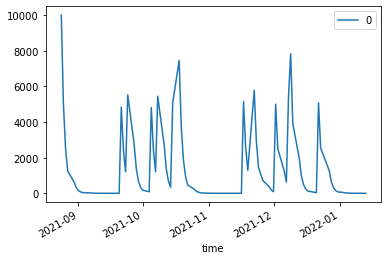

In [1476]:
money_on_hand_df.plot()

<AxesSubplot:xlabel='time'>

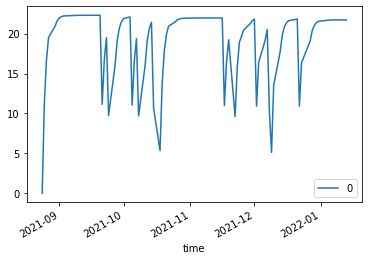

In [1477]:
shares_df.plot()

In [1478]:
value_of_shares_df=pd.DataFrame(shares_df[0].loc[:]*close_df.loc[:]["close"])

<AxesSubplot:xlabel='time'>

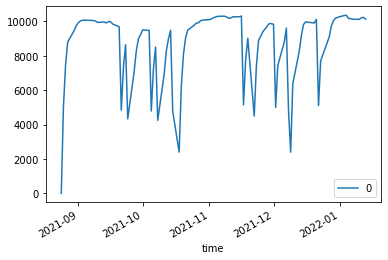

In [1479]:
value_of_shares_df.plot()

In [1480]:
value_of_shares_df

,0
time,
2020-02-13 00:00:00-05:00,NaN
2020-02-14 00:00:00-05:00,NaN
2020-02-18 00:00:00-05:00,NaN
2020-02-19 00:00:00-05:00,NaN
2020-02-20 00:00:00-05:00,NaN
...,...
2022-01-07 00:00:00-05:00,10122.002633
2022-01-10 00:00:00-05:00,10111.082066
2022-01-11 00:00:00-05:00,10202.490116


In [1481]:
# value_on_hand_df = value_of_shares_df[0] + money_on_hand_df[0]

In [1482]:
value_on_hand_df

,0
time,
2021-08-24 00:00:00-04:00,10000.000000
2021-08-25 00:00:00-04:00,10010.380623
2021-08-26 00:00:00-04:00,9966.711728
2021-08-27 00:00:00-04:00,10043.278627
2021-08-30 00:00:00-04:00,10085.747597
...,...
2022-01-07 00:00:00-05:00,10124.485780
2022-01-10 00:00:00-05:00,10112.323640
2022-01-11 00:00:00-05:00,10203.110903


In [1483]:
normalized_close_df = start_money * close_df_test["close"]/close_df_test.iloc[0]["close"]

<AxesSubplot:xlabel='time'>

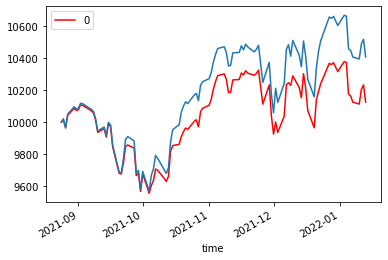

In [1484]:
ax = value_on_hand_df.plot(color = "red")
normalized_close_df.plot(ax=ax)

In [1485]:
money_on_hand

0.07759835747943637

In [1486]:
shares

21.72059750669164

In [1487]:
end_money = money_on_hand + shares * close_df.iloc[-1]["close"]

In [1488]:
end_money

10124.373905189052

In [1489]:
# gain if strategy implemented
end_money/start_money

1.0124373905189052

In [1490]:
value_on_hand_df.iloc[-1]/value_on_hand_df.iloc[0]

0    1.012437
dtype: float64

In [1491]:
# gain if you bought all day 1 and sold all at end of test period
close_df.iloc[-1]["close"]/close_df.iloc[-100]["close"]

1.040551400825985

In [1492]:
# # pseudocode outline:

# function to get price history - args are stock ticker/s, amount of days
# 	call alpaca
# 	return dataframe

# function to get twitter history
# 	possibly filter for repeated tweets
# 	return signal

# function to get news history
# 	return signal

# function to get reddit history
# 	return signal

# function to get general sentiment signals history
# 	call function to get twitter history
# 	call function to get news history
# 	call function to get reddit history
# 	return combined dataframe of signals


# function to get sentiment signals history of specific stock - arg is stock ticker
# 	call function to get twitter history
# 	call function to get news history
# 	call function to get reddit history
# 	return combined dataframe of signals

# function to run machine learning - arg is combined signals and stock history
# 	add additional columns for each signal for a daily percent change and a 5 day moving average a 100 day moving average
# 	scale
# 	train/test split
# 	try a few machine learning possibilities, svm, adaboost, possibly neural - try to guess if it will go up or down the following day

# 	try the following : reduce overfitting with early stopping
	
# 	neural - y is determined by whether it goes up or down the following day. two output neurons, highest one is selected to make signal.
# 	check amount correct, amount incorrect, and difference between actual and strategy.	

# 	neural 2nd stage - train only on the indexes which were incorrectly predicted.

	




# 	return buy/sell signal

# make function to calculate returns:
# don't use the function that just multiplies the signals by pct_return
# track the amount spent on each buy and amount returned on each sell.
# plot the total amount invested at any one time.
# possibly put a cutoff if no more money is available.
# possibly put a stop if unable to sell short.
# at the end, sell all or buy all short positions, get end result.
# compare to if the full amount initially available was all spent to purchase the stock at
# the beginning of the test period.


# Main function:
# 	determine which stocks to pull, one or many

# 	call function to get price history

# 	call function to get general sentiment signals history

# 	call function to get sentiment signals history for specific stock/s

# 	call function to run machine learning on the price history and signals

# 	output graphs





# terms to use in signal search for general:
# green
# renewable
# environment
# climate
# global warming
# climate crisis
# natural disaster
